TASK 1
prediction using supervised machine learning
Predict the percentage of an student based on the no. of study hours.
author : ch sai gowtham

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing the data
url = 'http://bit.ly/w-data'
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.info()
#there are no null values in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


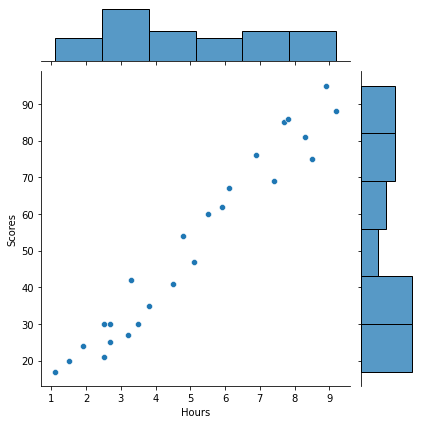

In [5]:
#visuvalizing the data 
sns.jointplot(x=data['Hours'],y=data['Scores'],data =data,kind = 'scatter')
#we can see from the graph that the score increases linearly with the number of hours

Splitting the data into training and test sets

In [6]:
from sklearn.model_selection import train_test_split
X=data.drop(columns='Scores')
y = data.drop(columns='Hours')

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

creating the model and training it 


In [8]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)


LinearRegression()

making predictions on the test data set using the model

In [9]:
predict = linreg.predict(X_test)

In [10]:
predict

array([[16.84472176],
       [33.74557494],
       [75.50062397],
       [26.7864001 ],
       [60.58810646],
       [39.71058194],
       [20.8213931 ]])

What will be predicted score if a student studies for 9.25 hrs/ day?

In [11]:
hours = 9.25
ran_predict =linreg.predict([[hours]])
print(f'no of hours: {hours}')
print(f'performance score: {ran_predict[0][0]}')

no of hours: 9.25
performance score: 93.89272889341655


evaluating the performance of the model

In [12]:
linreg.score(X_test,y_test)

0.9367661043365055

the accuracy of the linear regression model is 93.67% ie., the model predicts correct for 93% of the time 

checking the mean square error
mean square error = 1/N(observed_value - acutal_predicted_of_X)^2

In [13]:
from sklearn import metrics
print(f'Mean Square error :{metrics.mean_squared_error(y_test,predict)}')
print(f'Mean absolute error: {metrics.mean_absolute_error(y_test,predict)}')
print(f'R2 error: {metrics.r2_score(y_test,predict)}')

Mean Square error :20.33292367497997
Mean absolute error: 4.130879918502486
R2 error: 0.9367661043365055


predictions of linear model on data

In [14]:
print(f'slope (W): {linreg.coef_[0][0]}')
print(f'y-axis offset (b): {linreg.intercept_[0]}')

slope (W): 9.941678339488096
y-axis offset (b): 1.932204253151646


In [15]:
reg_line = (linreg.coef_*X )+linreg.intercept_

Text(0, 0.5, 'Score')

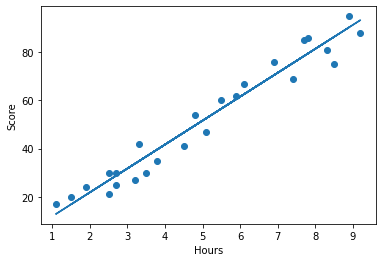

In [16]:
plt.plot(X,reg_line)
plt.scatter(X,y)
plt.xlabel('Hours')
plt.ylabel('Score')

the score of a student if he studies 9.25 hrs/day is 93.89